In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 2 Data Processing

## 2.1 Initial Inspection

In [3]:
#Loading data
df = pd.read_csv('ScreenAustralia_dataset.csv',index_col = 0)
#Preview dataframe by showing the first 5 line
df.head()

,Distributor,Release Date,Rating,Genre1,Genre2,Genre3,Country1,Country2,Country3,Director1,...,Lifetime multiple of Opening Weekend,Lifetime multiple of Opening Week,Min Screens,Max Screens,production_budget,creative_type,source,production_method,sequel,running_time
Title,,,,,,,,,,,,,,,,,,,,,
La Scala: Macbeth,Palace,29/01/2022,EX,Opera,Live,NaN,Italy,NaN,NaN,Davide Livermore,...,1.00,NaN,12.00,12.00,NaN,NaN,NaN,NaN,NaN,NaN
Good Luck Sakhi,Southern Star,28/01/2022,NaN,Comedy,Romance,NaN,India,NaN,NaN,Nagesh Kuknoor,...,1.00,NaN,7.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN
Parallel Mothers,Sony,27/01/2022,M,Drama,NaN,NaN,Spain,NaN,NaN,Pedro Almodovar,...,2.37,NaN,36.00,36.00,NaN,NaN,NaN,NaN,NaN,NaN
Hridayam,Nanma International,27/01/2022,M,Drama,Romance,NaN,India,NaN,NaN,Vineeth Sreenivasan,...,1.00,NaN,33.00,33.00,NaN,NaN,NaN,NaN,NaN,NaN
Queen Bees,Kismet,27/01/2022,PG,Comedy,Drama,Romance,USA,NaN,NaN,Michael Lembeck,...,1.03,NaN,231.00,231.00,NaN,Contemporary Fiction,Original Screenplay,Live Action,0.00,100.00


In [4]:
#Check data types, missing values, and the name of features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9304 entries, La Scala: Macbeth to Sleepy Hollow
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Distributor                           9304 non-null   object 
 1   Release Date                          9304 non-null   object 
 2   Rating                                9184 non-null   object 
 3   Genre1                                9279 non-null   object 
 4   Genre2                                5912 non-null   object 
 5   Genre3                                2672 non-null   object 
 6   Country1                              9298 non-null   object 
 7   Country2                              2232 non-null   object 
 8   Country3                              702 non-null    object 
 9   Director1                             9017 non-null   object 
 10  Director2                             434 non-null    object 
 1

## 2.2 Features Construction - Data Type Correction

In [5]:
#Change data type
#From string to float
df['% of Opening Weekend to Week'] = df['% of Opening Weekend to Week'].str.replace("%","").astype('float64')/100

## 2.3 Missing Value

Text(0.5, 1.0, 'Visualization of Missing Values')

<Figure size 7200x720 with 0 Axes>

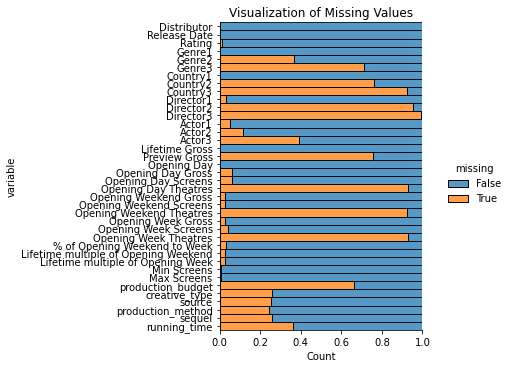

In [6]:
#Show the persentage of missing values for each features by bar chart
plt.figure(figsize=(100,10))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title('Visualization of Missing Values')
#plt.savefig("a",dpi=100, bbox_inches='tight')

In [7]:
#Delete missing value
df=df.drop(columns=['Genre2','Genre3','Country2','Country3','Director2','Director3','Actor2','Actor3'])

In [8]:
#Define function that help with replacing missing value by different ways
def refiller(column_name,by):
    if by == 'median': 
        df[column_name].fillna(df[column_name].median(),inplace=True) #Replacing missing value by median
    elif by == 'mode':
        df[column_name].fillna(stats.mode(df[column_name])[0][0],inplace=True)#Replacing missing value by mode
    elif by == 'zero':
        df[column_name].fillna(0.0,inplace=True) #Replacing missing value by 0
    elif by == 'na':
        df[column_name].fillna('Unidentified',inplace=True)#Replacing missing value by "Unidentified"

#Replace missing categorical value with mode
refiller('Rating','mode')

#Replace missing categorical value with 'Unidentified'
refiller('Genre1','na')
refiller('Country1','na')
refiller('Director1','na')
refiller('Actor1','na')
refiller('production_method','na')
refiller('creative_type','na')
refiller('source','na')

#Replace missing numerical value with median
refiller('Preview Gross','median')
refiller('Opening Day Gross','median')
refiller('Opening Day Screens','median')
refiller('Opening Day Theatres','median')
refiller('Opening Weekend Gross','median')
refiller('Opening Weekend Screens','median')
refiller('Opening Weekend Theatres','median')
refiller('Opening Week Gross','median')
refiller('Opening Week Screens','median')
refiller('Opening Week Theatres','median')
refiller('% of Opening Weekend to Week','median')
refiller('Lifetime multiple of Opening Weekend','median')
refiller('Lifetime multiple of Opening Week','median')
refiller('Min Screens','median')
refiller('Max Screens','median')
refiller('running_time','median')
refiller('production_budget','median')

#Replace missing binary variable with 0
refiller('sequel','zero')

## 2.4 Features Construction - New Added Features

In [9]:
#Add new feature 'year', which is the year of 'Release Date'
df['year'] = pd.DatetimeIndex(df['Release Date']).year

#Add new feature 'year group', which are groups of each 5 years
df['year group'] = df['year'].apply(lambda x: "2000" if x  <2005  else '2005' if (x >=2005 and x < 2010) else '2010' if (x >=2010 and x < 2015) else '2015' if (x >=2015 and x < 2020)  else '2020' if x >=2020  else x)

#Add new feature 'region', which are the continents tha teach country belongs to
domain_df = pd.read_csv('all.csv') #CSV file contained all countries and thier domain names
ddf = domain_df.iloc[:,[0,5]]
dd = dict(zip(ddf.name, ddf.region))
dd['USA'] = 'Americas'
dd['UK'] = 'Europe'
dd['South Korea'] = 'Asia'
dd['Czech Republic'] = 'Europe'
dd['Russia'] = 'Europe'
dd['Macedonia'] = 'Europe'
dd['Vietnam'] = 'Asia'
dd['Taiwan'] = 'Asia'
dd['Iran'] = 'Asia'
dd['Palestine'] = 'Asia'
dd['Timor Leste'] = 'Asia'
dd['Venezuela'] = 'Americas'
cc=list(df['Country1']) #list of all CountryCode
lst=[]     
#for every CountryCode from df, classify them into different counties based on list domain
for i in cc:
    s=str(i)            
    if(s=='Unidentified'):        
        lst.append('Unidentified')
    else:
        lst.append(dd[s])
df['region'] = lst

# 3  Exploratory Data Analysis

## 3.1.1 Target variable

In [10]:
#Delete the rows that have 'Lifetime Gross' equal to 0
df = df.loc[df['Lifetime Gross']!=0]

#Statistic of target variable
y = df['Lifetime Gross']
y.describe()

count        9302.00
mean      2300121.31
std       5947467.26
min             8.00
25%         35604.75
50%        170075.50
75%       1403402.00
max     115781489.00
Name: Lifetime Gross, dtype: float64

<AxesSubplot:title={'center':'Density Plot of Lifetime Gross'}, xlabel='Lifetime Gross', ylabel='Count'>

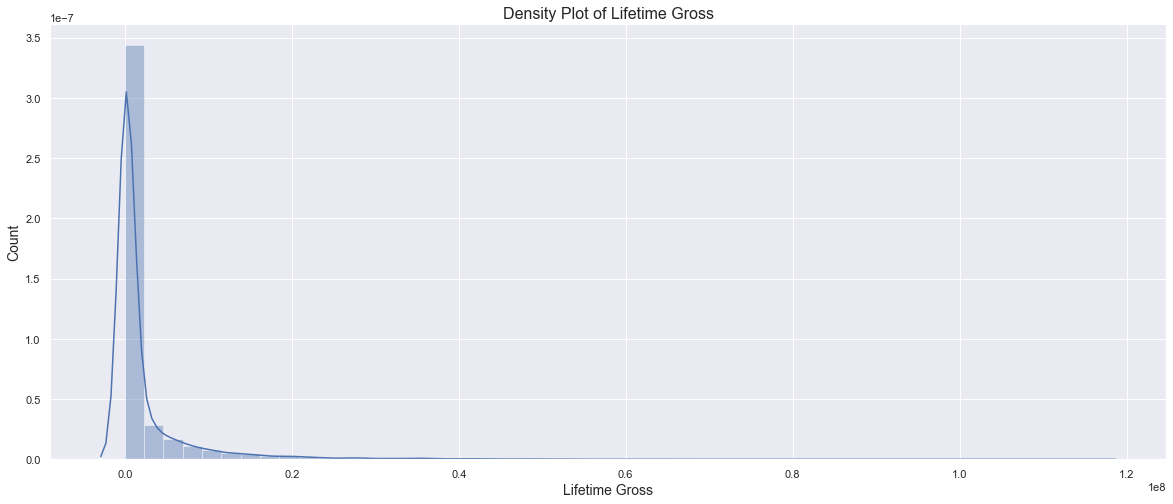

In [11]:
#Delete the rows that have 'Lifetime Gross' equal to 0
df = df.loc[df['Lifetime Gross']!=0]
#Distribution of target variable
sns.set(rc={'figure.figsize':(20,8)})
plt.title('Density Plot of Lifetime Gross',fontsize=16)
plt.ylabel('Count',fontsize=14)
plt.xlabel("Lifetime Gross($)",fontsize=14)
sns.distplot(y)
#plt.savefig("dengsity plot of life gross",dpi=100, bbox_inches='tight')

In [12]:
#Kurtosis and skewness of target variable
Gross_kurtosis = stats.kurtosis(y)   
Gross_skewness = stats.skew(y)  
print('The kurtois of Lifetime Gross: '+ str((round(Gross_kurtosis,2))))
print('The skewness of Lifetime Gross: '+ str((round(Gross_skewness,2))))

The kurtois of Lifetime Gross: 46.58
The skewness of Lifetime Gross: 5.41


<AxesSubplot:title={'center':'Density Plot of Log Lifetime Gross'}, xlabel='log Lifetime Gross', ylabel='Count'>

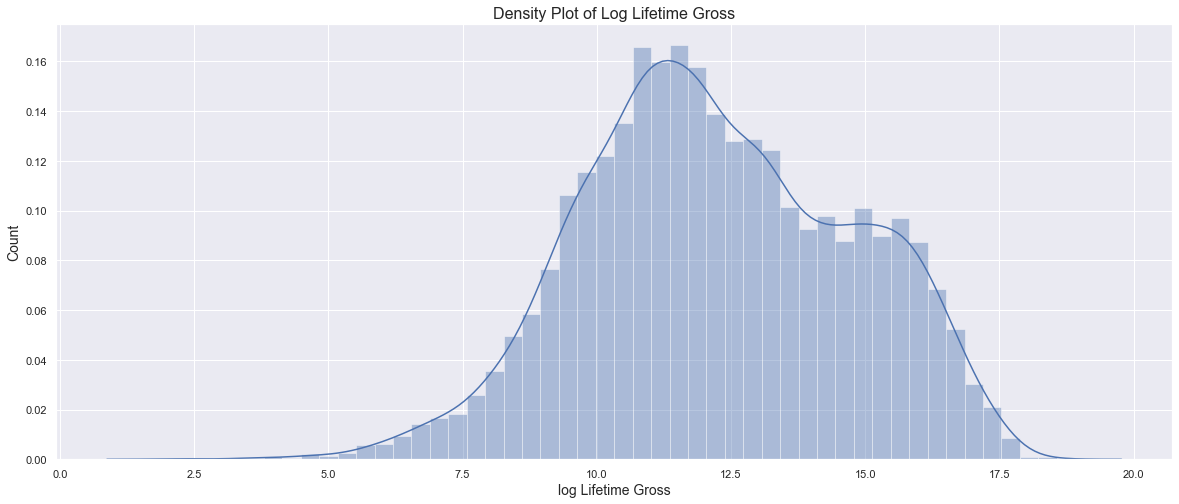

In [13]:
df['log Lifetime Gross'] = np.log(df['Lifetime Gross'])
plt.title('Density Plot of Log Lifetime Gross',fontsize=16)
plt.ylabel('Count',fontsize=14)
plt.xlabel("Log Lifetime Gross($)",fontsize=14)
sns.distplot(df['log Lifetime Gross'])
#plt.savefig("dengsity plot of log life gross",dpi=100, bbox_inches='tight')

In [14]:
new_kurtosis = stats.kurtosis(df['log Lifetime Gross'])   
new_skewness = stats.skew(df['log Lifetime Gross'])  
print('The kurtois of Log Lifetime Gross: '+ str((round(new_kurtosis,2))))
print('The skewness of Log Lifetime Gross: '+ str((round(new_skewness,2))))

The kurtois of Log Lifetime Gross: -0.44
The skewness of Log Lifetime Gross: -0.03


## 3.1.2 Categorical Features

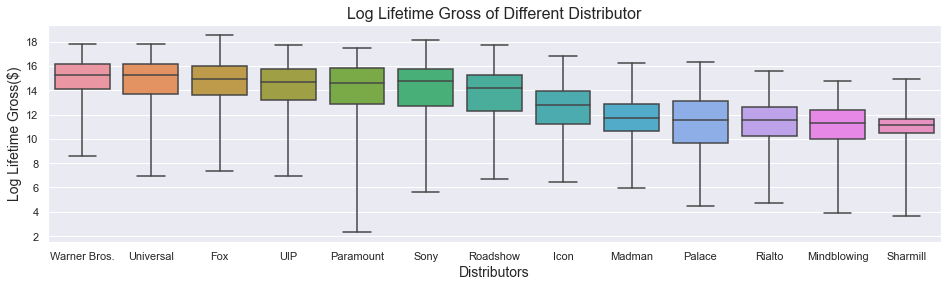

In [15]:
#Create a list with all categorical features
cat_features = df.loc[:,df.dtypes == 'object']
cat_features['sequel']  = df['sequel']
cat_lst = cat_features.columns.values
cat_lst= cat_lst.tolist()


#Draw boxplots of log Lifetime Gross of Distributors
q=df.Distributor.value_counts()
qq =np.quantile(q, 0.95)
newdf = pd.DataFrame()
newdf['1'] = q.index.tolist()
newdf['2'] = q.values.tolist()
xx = newdf['1'] [newdf['2']>qq].tolist()
dfx= df.loc[df['Distributor'].isin(xx)]
plt.figure(figsize=(16,4))
ranks = dfx.groupby("Distributor")["log Lifetime Gross"].mean().sort_values()[::-1].index
# Plot the orbital period with horizontal boxes
sns_plot = sns.boxplot(x='Distributor',y='log Lifetime Gross',data=dfx,
                 whis=np.inf,  order = ranks)
plt.xlabel("Distributors",fontsize=14)
plt.ylabel("Log Lifetime Gross($)",fontsize=14)
plt.title('Log Lifetime Gross of Different Distributor',fontsize=16)
#plt.savefig("Log Lifetime Gross of different Distributor",dpi=1000, bbox_inches='tight')
plt.show()

In [16]:
for i in ['Director1','Rating','Country1','source','creative_type','production_method','Opening Day','Genre1']:
    obj = df.groupby([i])['Lifetime Gross'].median()
    print(obj.sort_values(ascending=False)[:10],'/n')
    print('====================================================')

Director1
Chris Buck           38016502.50
Jon Watts            37334473.00
Bradley Cooper       36570815.00
Cary Joji Fukunaga   35665012.00
Michael Gracey       34927964.00
David Yates          33988099.00
Kyle Balda           32919710.50
David Silverman      31435836.00
Pete Docter          29614721.50
Pierre Coffin        29095578.50
Name: Lifetime Gross, dtype: float64 /n
Rating
G         451585.50
MA15+     259268.00
PG        230946.50
M         212987.50
VARIOUS   192084.50
R18+      101505.00
EX         26791.00
TBC         5758.00
Name: Lifetime Gross, dtype: float64 /n
Country1
USA            1356625.50
Saudi Arabia    716706.00
Lebanon         596049.00
Slovakia        554931.00
Kazakhstan      554155.00
Bhutan          543289.00
Afghanistan     439311.00
Bulgaria        400434.00
Paraguay        361915.00
Iceland         349543.50
Name: Lifetime Gross, dtype: float64 /n
source
Based on Theme Park Ride              20053972.00
Based on Toy                           8090573.

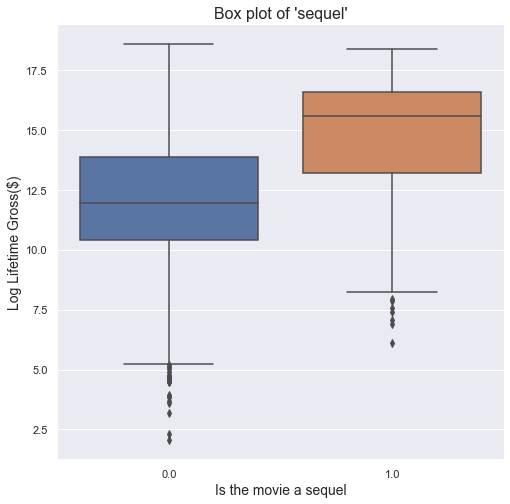

In [17]:
#sequel
plt.figure(figsize=(8,8))
sns_plot = sns.boxplot(x='sequel',y='log Lifetime Gross',data=df)
plt.xlabel("Is the movie a sequel",fontsize=14)
plt.ylabel("Log Lifetime Gross($)",fontsize=14)
plt.title("Box plot of 'sequel'",fontsize=16)
plt.savefig("Box plot of sequel",dpi=1000, bbox_inches='tight')
plt.show()

## 3.1.3 Numerical Features

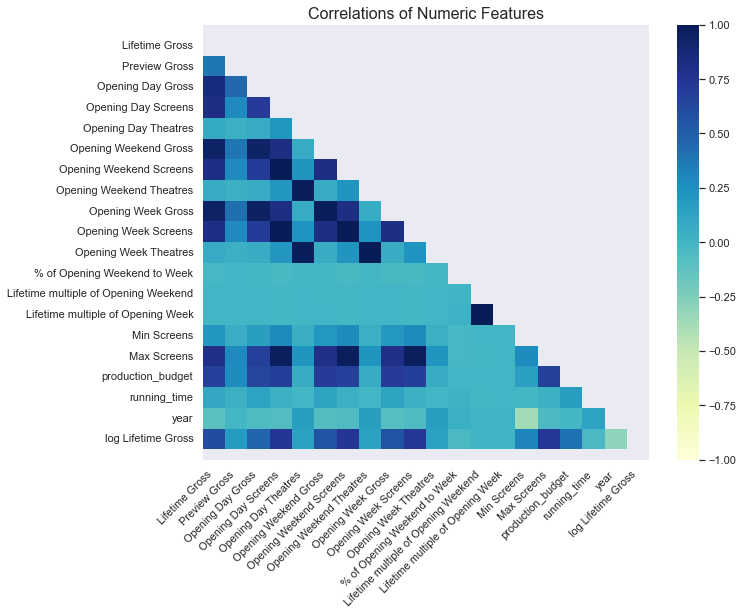

In [18]:
#Extract all numerical features
num_feature = df.loc[:,df.dtypes != 'object']
df1 = num_feature.drop(columns=['sequel'])
d = df1.isnull().sum()/df1.shape[0]*100
d.sort_values()
#Calculate correlation and draw heatmap to show the correlation between numerical features
corr = df1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize = (10,8))
plt.title('Correlations of Numeric Features',y=1,size=16)
ax = sns.heatmap(corr,mask = mask,cmap='YlGnBu', vmax=1,vmin = -1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)
figure = ax.get_figure()
#plt.savefig("Correlations of Numeric Features",dpi=100, bbox_inches='tight')

In [19]:
#Rank the correlation between each feature and target variable
print(corr['log Lifetime Gross'].sort_values(ascending = False),'\n')

log Lifetime Gross                      1.00
Opening Weekend Screens                 0.74
Opening Day Screens                     0.74
Opening Week Screens                    0.73
Max Screens                             0.73
Lifetime Gross                          0.61
Opening Week Gross                      0.56
Opening Weekend Gross                   0.56
Opening Day Gross                       0.46
production_budget                       0.39
Min Screens                             0.31
Preview Gross                           0.18
Opening Week Theatres                   0.14
Opening Weekend Theatres                0.14
Opening Day Theatres                    0.14
Lifetime multiple of Opening Weekend    0.01
Lifetime multiple of Opening Week       0.00
% of Opening Weekend to Week           -0.03
running_time                           -0.04
year                                   -0.30
Name: log Lifetime Gross, dtype: float64 



## 3.2 Overall EDA

In [20]:
#Calculate the total and average of Log Lifetime Gross
sum_gross =df.groupby(['year'])['log Lifetime Gross'].sum()
avg_gross = df.groupby(['year'])['log Lifetime Gross'].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

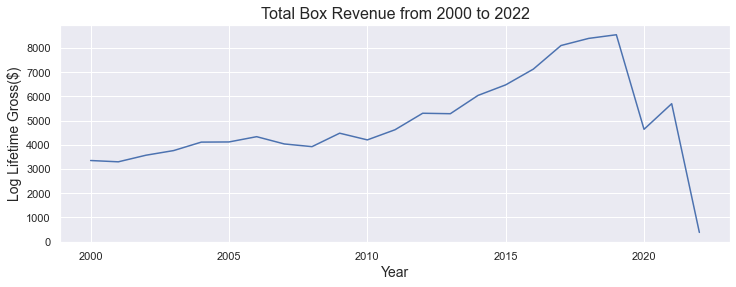

In [21]:
#Observe the change of total box revenue by drawing line chart
plt.figure(figsize=(12,4)) 
plt.plot(sum_gross)
plt.title('Total Box Revenue from 2000 to 2022',fontsize=16)
plt.ylabel('Log Lifetime Gross($)',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.show
#plt.savefig("Total box revenue from 2000 to 2022",dpi=100, bbox_inches='tight')

<function matplotlib.pyplot.show(close=None, block=None)>

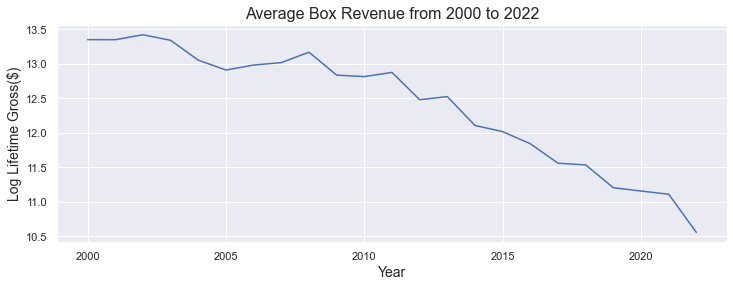

In [22]:
#Observe the change of average box revenue by drawing line chart
plt.figure(figsize=(12,4)) 
plt.plot(avg_gross)
plt.title('Average Box Revenue from 2000 to 2022',fontsize=16)
plt.ylabel('Log Lifetime Gross($)',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.show
#plt.savefig("Average box revenue from 2000 to 2022",dpi=100, bbox_inches='tight')

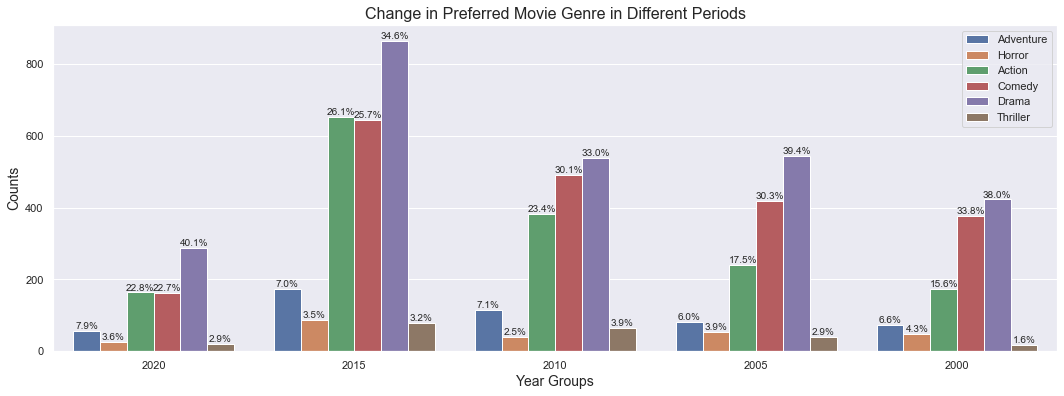

In [23]:
#Showing the change of preferred movie genre in different periods
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=10, ha='center', va='bottom')

plt.figure(figsize=(18,6))
ax3 = sns.countplot(x='year group', hue='Genre1', data=df, hue_order=['Adventure', 'Horror','Action', 'Comedy','Drama','Thriller'])
ax3.set(xlabel='year group', ylabel='Count')

percentage_above_bar_relative_to_xgroup(ax3)
plt.legend(loc='best')
plt.ylabel("Counts",fontsize=14)
plt.xlabel("Year Groups",fontsize=14)
plt.title('Change in Preferred Movie Genre in Different Periods',fontsize=16)
#plt.savefig("Change in preferred movie genre in different periods",dpi=100, bbox_inches='tight')
plt.show()

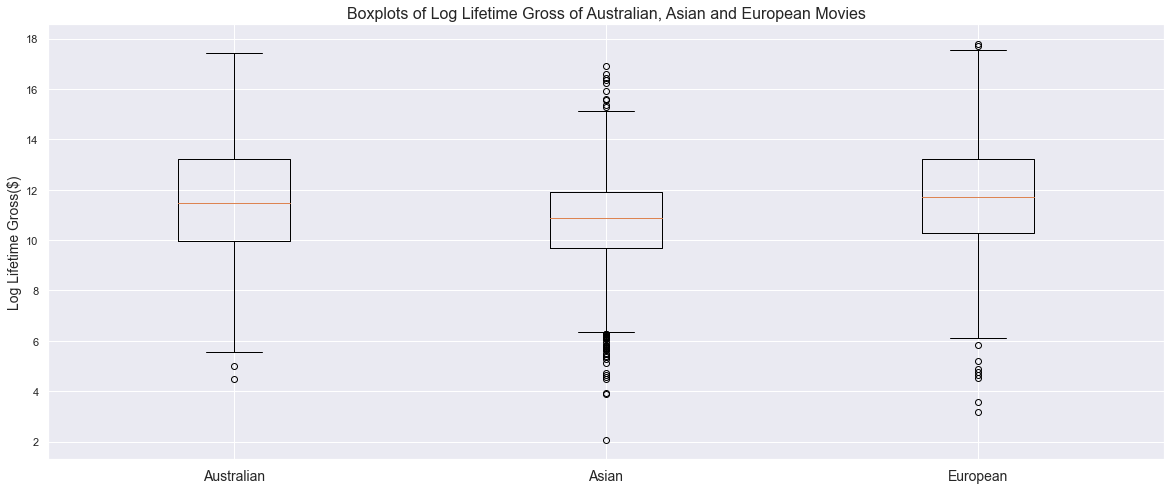

In [24]:
#Create lists corresponding to 3 analyzed regions, which are Australia, Asia, and Europe
df_au = df[df['Country1'] == 'Australia'] 
df_as = df[df['region'] == 'Asia'] 
df_eu = df[df['region'] == 'Europe'] 

#Draw box plots of Lifetime Gross in these regions
T1 =df_au['log Lifetime Gross']
T2 =df_as['log Lifetime Gross']
T3 =df_eu ['log Lifetime Gross']
ax = plt.subplot()
ax.boxplot([T1, T2, T3])
ax.set_xticklabels(['Australian', 'Asian', 'European'], fontsize=14)
plt.ylabel("Log Lifetime Gross($)", fontsize=14)
plt.title('Boxplots of Log Lifetime Gross of Australian, Asian and European Movies',fontsize=16)
#plt.savefig("Boxplots of log Lifetime Gross of Australian, Asian and European movies",dpi=100, bbox_inches='tight')
plt.show()

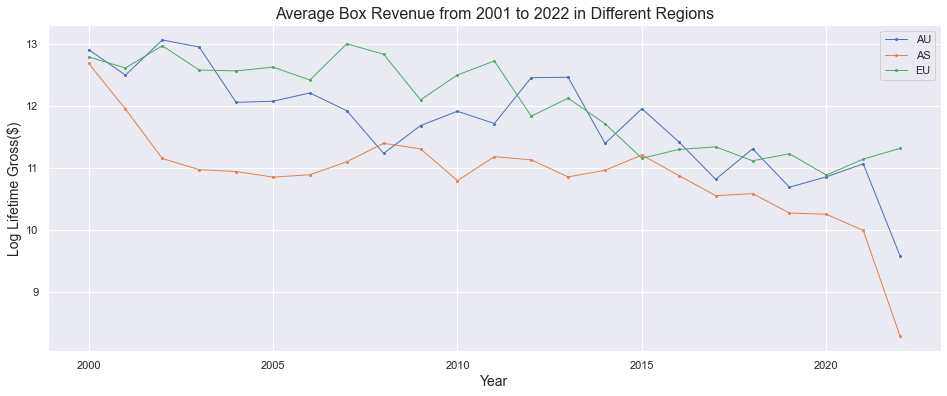

In [25]:
#Caluculate the average Log Lifetime Gross every year in the 3 regions
avg_gross_au = df_au.groupby(['year'])['log Lifetime Gross'].mean()
avg_gross_as = df_as.groupby(['year'])['log Lifetime Gross'].mean()
avg_gross_eu = df_eu.groupby(['year'])['log Lifetime Gross'].mean()

#Create a dataframe to record
total_avg_gross = pd.DataFrame()
total_avg_gross['year'] = avg_gross_au.index.tolist()
total_avg_gross['AU'] = avg_gross_au.values.tolist()
total_avg_gross['AS'] = avg_gross_as.values.tolist()
total_avg_gross['EU'] = avg_gross_eu.values.tolist()
total_avg_gross['year'] = total_avg_gross['year'].astype('str')

#Draw multiple line chart to show the change trend
fig = plt.figure(figsize=(16,6))
ax= fig.add_subplot(1,1,1)
total_avg_gross.plot(x='year',kind='line',marker='o',markersize=2,linestyle='-',linewidth=1 ,legend = True,ax = ax)
plt.title('Average Box Revenue from 2001 to 2022 in Different Regions',fontsize=16)
plt.ylabel('Log Lifetime Gross($)',fontsize=14)
plt.xlabel("Year", fontsize=14)
#plt.savefig("Average box revenue from 2001 to 2022 in different regions",dpi=100, bbox_inches='tight')
plt.show()

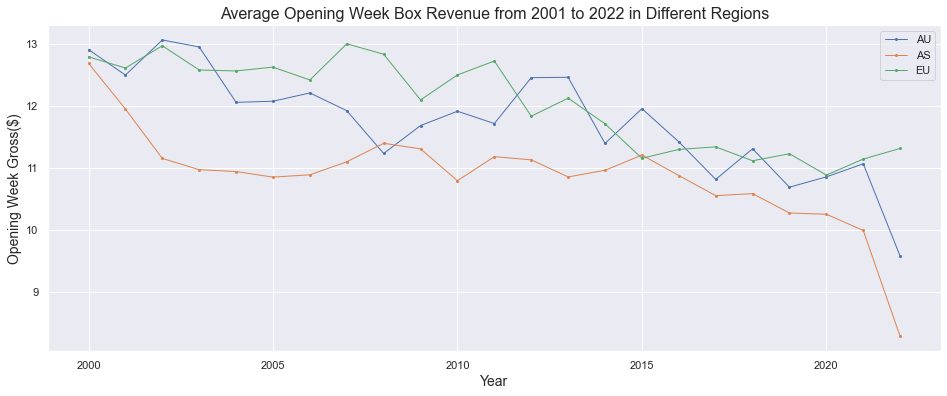

In [26]:
#Draw multiple line chart to show the change trend
fig = plt.figure(figsize=(16,6))
ax= fig.add_subplot(1,1,1)
total_avg_gross.plot(x='year',kind='line',marker='o',markersize=2,linestyle='-',linewidth=1 ,legend = True,ax = ax)
plt.title('Average Opening Week Box Revenue from 2001 to 2022 in Different Regions',fontsize=16)
plt.ylabel('Opening Week Gross($)',fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.savefig("Average Opening Weekbox revenue from 2001 to 2022 in different regions",dpi=100, bbox_inches='tight')
plt.show()

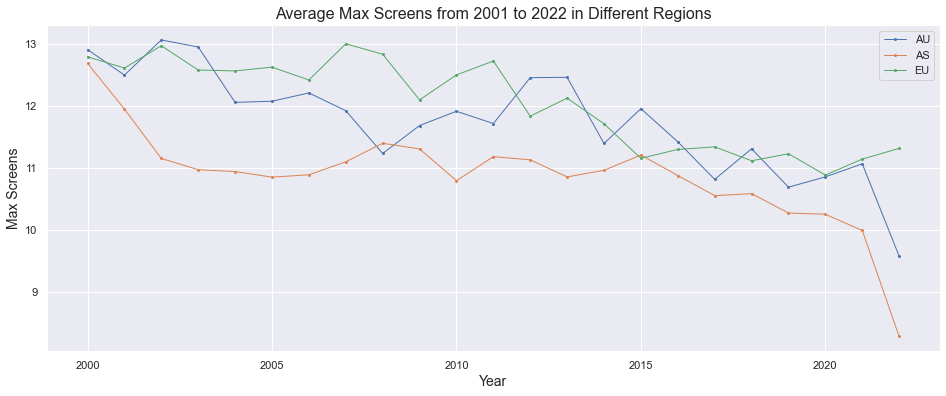

In [27]:
#Draw multiple line chart to show the change trend
fig = plt.figure(figsize=(16,6))
ax= fig.add_subplot(1,1,1)
total_avg_gross.plot(x='year',kind='line',marker='o',markersize=2,linestyle='-',linewidth=1 ,legend = True,ax = ax)
plt.title('Average Max Screens from 2001 to 2022 in Different Regions',fontsize=16)
plt.ylabel('Max Screens',fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.savefig("Average Max Screens from 2001 to 2022 in different regions",dpi=100, bbox_inches='tight')
plt.show()

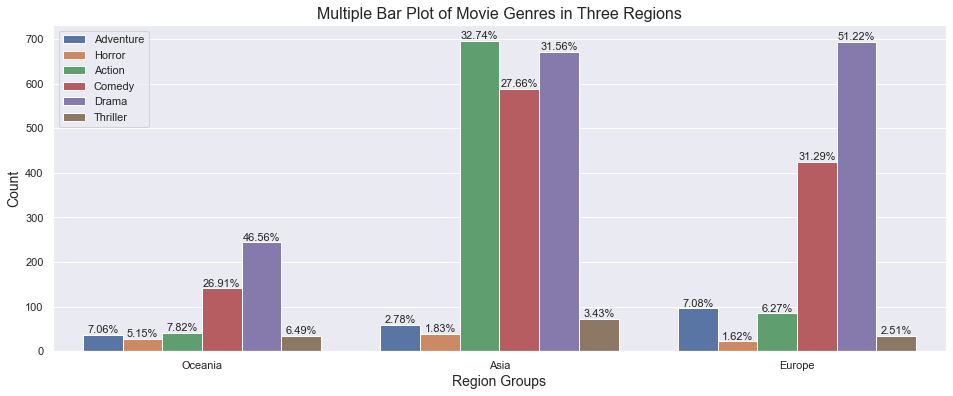

In [28]:
#Draw Multiple bar plot to show the preferred movie genres in three countries
df_region= pd.concat([df_au,df_as,df_eu])
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.2f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

plt.figure(figsize=(16,6))
ax3 = sns.countplot(x='region', hue='Genre1', data=df_region, hue_order=['Adventure', 'Horror','Action', 'Comedy','Drama','Thriller'])
ax3.set(xlabel='Region Groups', ylabel='Count')

percentage_above_bar_relative_to_xgroup(ax3)
plt.legend(loc='best')
plt.title('Multiple Bar Plot of Movie Genres in Three Regions',fontsize=16)
plt.ylabel('Count',fontsize=14)
plt.xlabel("Region Groups", fontsize=14)
#plt.savefig("Multiple Bar Plot of Movie Genres in Three Regions",dpi=100, bbox_inches='tight')
plt.show()

## 3.3 Feature Engineering

In [29]:
df.reset_index()
small_cat_features = \
    df.dtypes[df.dtypes == 'object'][df[df.dtypes[df.dtypes == 'object'].index.tolist()].nunique() < 50].index.tolist()
small_cat_features

['Rating',
 'Genre1',
 'Opening Day',
 'creative_type',
 'source',
 'production_method',
 'year group',
 'region']

In [30]:
data_2 = pd.get_dummies(df, columns=small_cat_features)

In [31]:
data_2=data_2.reset_index()
data_2

,Title,Distributor,Release Date,Country1,Director1,Actor1,Lifetime Gross,Preview Gross,Opening Day Gross,Opening Day Screens,...,year group_2005,year group_2010,year group_2015,year group_2020,region_Africa,region_Americas,region_Asia,region_Europe,region_Oceania,region_Unidentified
0,La Scala: Macbeth,Palace,29/01/2022,Italy,Davide Livermore,Anna Netrebko,7594,19675.00,3532.00,10.00,...,0,0,0,1,0,0,0,1,0,0
1,Good Luck Sakhi,Southern Star,28/01/2022,India,Nagesh Kuknoor,Keerthi Suresh,2197,19675.00,677.00,5.00,...,0,0,0,1,0,0,1,0,0,0
2,Parallel Mothers,Sony,27/01/2022,Spain,Pedro Almodovar,Rossy de Palma,165725,54997.00,8615.00,36.00,...,0,0,0,1,0,0,0,1,0,0
3,Hridayam,Nanma International,27/01/2022,India,Vineeth Sreenivasan,Kalyani Priyadarshan,139792,19675.00,2603.00,2.00,...,0,0,0,1,0,0,1,0,0,0
4,Queen Bees,Kismet,27/01/2022,USA,Michael Lembeck,Christopher Lloyd,111848,2802.00,18056.00,207.00,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9297,"Happy, Texas",Palace,13/01/2000,USA,Mark Illsley,Jeremy Northam,449721,19675.00,11340.50,21.00,...,0,0,0,0,0,1,0,0,0,0
9298,Winter Sleepers,Potential,13/01/2000,Germany,Tom Tykwer,Ulrich Matthes,85957,19675.00,11340.50,21.00,...,0,0,0,0,0,0,0,1,0,0
9299,Double Jeopardy,UIP,6/01/2000,USA,Bruce Beresford,Tommy Lee Jones,11016299,19675.00,538827.00,197.00,...,0,0,0,0,0,1,0,0,0,0
9300,Deuce Bigalow,BVI,6/01/2000,USA,Mike Mitchell,Rob Schneider,10340937,19675.00,581403.00,169.00,...,0,0,0,0,0,1,0,0,0,0


In [32]:
large_cat_features = \
    list(set(df.dtypes[df.dtypes == 'object'].index.tolist()) - set(small_cat_features))
large_cat_features

['Distributor', 'Actor1', 'Release Date', 'Director1', 'Country1']

In [33]:
new_features = ['Country1_USA', 'Country1_UK', 'Country1_China',  'Country1_France',
                'Country1_Japan', 'Country1_South_Korea', 'Country1_Canada', 
                'Country1_Australia',  'Country1_India']

In [34]:
data_2[new_features] = 0
for i in range(data_2.shape[0]):
    # country 1
    if data_2.iloc[i]['Country1'] == 'USA':
        data_2.at[i, 'Country1_USA']= 1
    elif data_2.iloc[i]['Country1'] == 'UK':
        data_2.at[i, 'Country1_UK']= 1
    elif data_2.iloc[i]['Country1'] == 'China':
        data_2.at[i, 'Country1_China']= 1
    elif data_2.iloc[i]['Country1'] == 'France':
        data_2.at[i, 'Country1_France']= 1
    elif data_2.iloc[i]['Country1'] == 'Japan':
        data_2.at[i, 'Country1_Japan']= 1
    elif data_2.iloc[i]['Country1'] == 'South_Korea':
        data_2.at[i, 'Country1_South_Korea']= 1
    elif data_2.iloc[i]['Country1'] == 'Canada':
        data_2.at[i, 'Country1_Canada']= 1
    elif data_2.iloc[i]['Country1'] == 'Australia':
        data_2.at[i, 'Country1_Australia']= 1
    elif data_2.iloc[i]['Country1'] == 'India':
        data_2.at[i, 'Country1_India']= 1

In [35]:
data_2.drop(columns=['Country1'], axis=1, inplace=True)

In [36]:
data_2.drop(columns=['Title'], axis=1, inplace=True)

In [37]:
actor_features = ['Actor1', 'Director1', 'Distributor']
data_2[actor_features].nunique()

Actor1         4411
Director1      5089
Distributor     258
dtype: int64

In [38]:
actor_features_top_10 = {}

for f in actor_features:
    obj = data_2.groupby(by=f)
    gross_rank = obj.sum()['Lifetime Gross'].sort_values(ascending=False)
    actor_features_top_10[f] = gross_rank.index.tolist()[:10]

In [39]:
actor_features_top_10

{'Actor1': ['Johnny Depp',
  'Daniel Radcliffe',
  'Ben Stiller',
  'Hugh Jackman',
  'Tom Hanks',
  'Robert Downey Jr.',
  'Adam Sandler',
  'Tom Cruise',
  'Leonardo Dicaprio',
  'Ryan Reynolds'],
 'Director1': ['Peter Jackson',
  'David Yates',
  'Christopher Nolan',
  'Anthony Russo',
  'J.J. Abrams',
  'Ridley Scott',
  'Michael Bay',
  'Steven Spielberg',
  'Jon Favreau',
  'Francis Lawrence'],
 'Distributor': ['Fox',
  'Roadshow',
  'Walt Disney',
  'Universal',
  'Warner Bros.',
  'Sony',
  'Paramount',
  'UIP',
  'BVI',
  'CTS']}

In [40]:
new_act_features = []
for key in list(actor_features_top_10.keys()):
    for name in actor_features_top_10[key]:
        if 'Unidentified' not in name:
            new_act_features.append('%s_%s'%(key, name))
new_act_features

['Actor1_Johnny Depp',
 'Actor1_Daniel Radcliffe',
 'Actor1_Ben Stiller',
 'Actor1_Hugh Jackman',
 'Actor1_Tom Hanks',
 'Actor1_Robert Downey Jr.',
 'Actor1_Adam Sandler',
 'Actor1_Tom Cruise',
 'Actor1_Leonardo Dicaprio',
 'Actor1_Ryan Reynolds',
 'Director1_Peter Jackson',
 'Director1_David Yates',
 'Director1_Christopher Nolan',
 'Director1_Anthony Russo',
 'Director1_J.J. Abrams',
 'Director1_Ridley Scott',
 'Director1_Michael Bay',
 'Director1_Steven Spielberg',
 'Director1_Jon Favreau',
 'Director1_Francis Lawrence',
 'Distributor_Fox',
 'Distributor_Roadshow',
 'Distributor_Walt Disney',
 'Distributor_Universal',
 'Distributor_Warner Bros.',
 'Distributor_Sony',
 'Distributor_Paramount',
 'Distributor_UIP',
 'Distributor_BVI',
 'Distributor_CTS']

In [41]:
data_2[new_act_features] = 0
for i in range(data_2.shape[0]):
    # Actor1
    for name in new_act_features[:9]:
        if data_2.iloc[i]['Actor1'] == name.replace('Actor1_', ""):
            data_2.at[i, name] = 1
    for name in new_act_features[9:18]:
        if data_2.iloc[i]['Director1'] == name.replace('Director1_', ""):
            data_2.at[i, name] = 1
    for name in new_act_features[-10:]:
        if data_2.iloc[i]['Distributor'] == name.replace('Distributor_', ""):
            data_2.at[i, name] = 1  

In [42]:
data_2.drop(columns = actor_features, axis=1, inplace=True)

In [43]:
date_data = data_2['Release Date'].str.split('/', expand=True)
date_data.drop(columns = 2, axis=1, inplace=True)
date_data.columns = ['day','month']
# date_data = date_data.drop(labels=['day'], axis=1)
date_data = date_data.astype('int16')
data_2 = pd.concat([data_2, date_data], axis=1)

In [44]:
data_2['Release Date'] = data_2.year*10000 + data_2.month * 100 + data_2.day

## 4 Normlization

In [45]:
from sklearn.model_selection import train_test_split
y = data_2['log Lifetime Gross']
X = data_2.drop(columns = ['log Lifetime Gross','Lifetime Gross','year'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_train_norm = minmax.fit_transform(X_train)

X_test_norm = minmax.transform(X_test)

# 5 Model Construction

## 5.1 Multi-linear regression

In [47]:
#Benchmark 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

#train the model
lr = LinearRegression()
lr.fit(X_train_norm, y_train) 

#predict
pred_lr = lr.predict(X_test_norm)
pred_lr[pred_lr<0] = 0

#calculate RMSLE
rmsle_lr = mean_squared_log_error(np.exp(y_test),np.exp(pred_lr))
rmsle_lr 

2.0988724698435717

In [48]:
def coefficients_rank_plot(model, labels = X_train.columns):
    coef = model.coef_
    table = pd.Series(coef.ravel(), index = labels).sort_values(ascending=True, inplace=False)
    
    all_ = True
    if len(table) > 10:
        reference = pd.Series(np.abs(coef.ravel()), index = labels).sort_values(ascending=False, inplace=False)
        reference = reference.iloc[:20]
        table = table[reference.index]
        table = table.sort_values(ascending=True, inplace=False)
        all_ = False
        

    fig, ax = fig, ax = plt.subplots()
    table.T.plot(kind='barh', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    if all_:
        ax.set_title('All  coefficients', fontsize=14)
    else: 
        ax.set_title('Top 20 coefficients (absolute value)', fontsize=14)
    sns.despine()
    return fig, ax

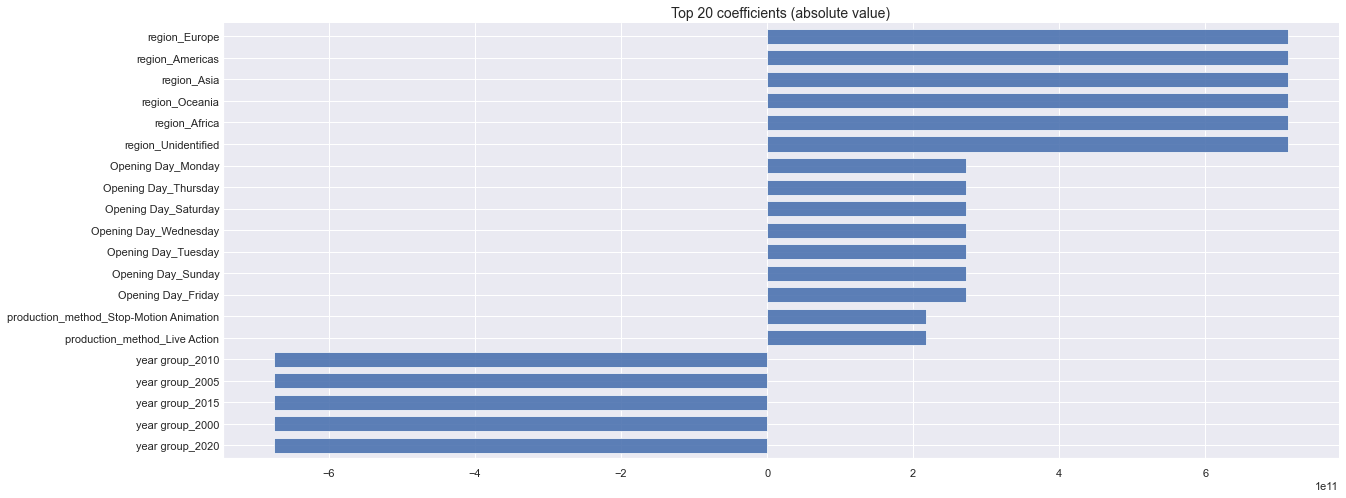

In [49]:
coefficients_rank_plot(lr)
plt.show()

## 5.2 Ridge

In [50]:
from sklearn.linear_model import Ridge, RidgeCV

ridge = Ridge(alpha=.1)
ridge.fit(X_train_norm, y_train)

Ridge(alpha=0.1)

In [55]:
#parameter tunning
alphas = np.linspace(0.01,2,1000)
ridgeCV =RidgeCV(alphas=alphas,store_cv_values=True)
ridgeCV.fit(X_train_norm, y_train)

RidgeCV(alphas=array([0.01      , 0.01199199, 0.01398398, 0.01597598, 0.01796797,
       0.01995996, 0.02195195, 0.02394394, 0.02593594, 0.02792793,
       0.02991992, 0.03191191, 0.0339039 , 0.0358959 , 0.03788789,
       0.03987988, 0.04187187, 0.04386386, 0.04585586, 0.04784785,
       0.04983984, 0.05183183, 0.05382382, 0.05581582, 0.05780781,
       0.0597998 , 0.06179179, 0.06378378, 0.06577578, 0.06776777,
       0.06975...
       1.93227227, 1.93426426, 1.93625626, 1.93824825, 1.94024024,
       1.94223223, 1.94422422, 1.94621622, 1.94820821, 1.9502002 ,
       1.95219219, 1.95418418, 1.95617618, 1.95816817, 1.96016016,
       1.96215215, 1.96414414, 1.96613614, 1.96812813, 1.97012012,
       1.97211211, 1.9741041 , 1.9760961 , 1.97808809, 1.98008008,
       1.98207207, 1.98406406, 1.98605606, 1.98804805, 1.99004004,
       1.99203203, 1.99402402, 1.99601602, 1.99800801, 2.        ]),
        store_cv_values=True)

In [56]:
# best alpha
best_alpha = ridgeCV.alpha_
best_alpha = round(best_alpha, 4)

In [57]:
best_alpha

1.5538

In [58]:
ridge =Ridge(alpha= best_alpha )
ridge.fit(X_train_norm, y_train)

Ridge(alpha=1.5538)

In [59]:
pred_ridge = ridge.predict(X_test_norm)
pred_ridge[pred_ridge<0] = 0

rmsle_ridge = mean_squared_log_error(np.exp(y_test),np.exp(pred_ridge))
rmsle_ridge

1.9624876003529244

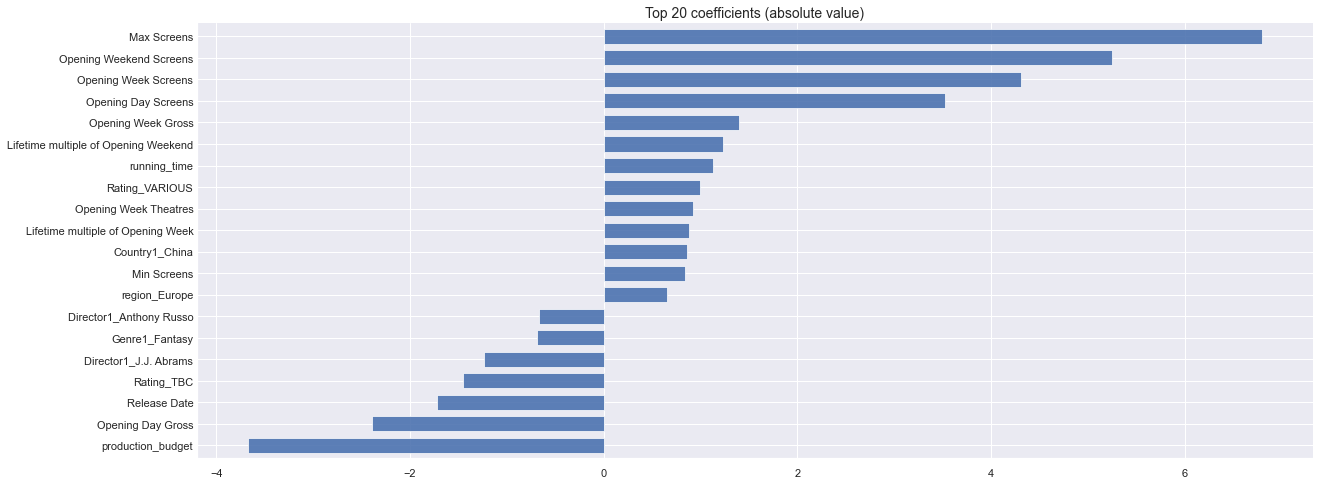

In [60]:
coefficients_rank_plot(ridge)
plt.show()

## 5.3 Lasso

In [61]:
from sklearn.linear_model import Lasso, LassoCV
lasso = Lasso(alpha=.1)
lasso.fit(X_train_norm, y_train)

Lasso(alpha=0.1)

In [62]:
alphas = np.linspace(0.01,2,1000)
lassoCV = LassoCV(alphas=alphas)
lassoCV.fit(X_train_norm, y_train)

LassoCV(alphas=array([0.01      , 0.01199199, 0.01398398, 0.01597598, 0.01796797,
       0.01995996, 0.02195195, 0.02394394, 0.02593594, 0.02792793,
       0.02991992, 0.03191191, 0.0339039 , 0.0358959 , 0.03788789,
       0.03987988, 0.04187187, 0.04386386, 0.04585586, 0.04784785,
       0.04983984, 0.05183183, 0.05382382, 0.05581582, 0.05780781,
       0.0597998 , 0.06179179, 0.06378378, 0.06577578, 0.06776777,
       0.06975...
       1.93227227, 1.93426426, 1.93625626, 1.93824825, 1.94024024,
       1.94223223, 1.94422422, 1.94621622, 1.94820821, 1.9502002 ,
       1.95219219, 1.95418418, 1.95617618, 1.95816817, 1.96016016,
       1.96215215, 1.96414414, 1.96613614, 1.96812813, 1.97012012,
       1.97211211, 1.9741041 , 1.9760961 , 1.97808809, 1.98008008,
       1.98207207, 1.98406406, 1.98605606, 1.98804805, 1.99004004,
       1.99203203, 1.99402402, 1.99601602, 1.99800801, 2.        ]))

In [63]:
best_alpha = lassoCV.alpha_
best_alpha = round(best_alpha, 4)

In [64]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_norm, y_train)

Lasso(alpha=0.01)

In [65]:
pred_lasso = lasso.predict(X_test_norm)
pred_lasso[pred_lasso<0] = 0
rmsle_lasso = mean_squared_log_error(np.exp(y_test),np.exp(pred_lasso))
rmsle_lasso

2.068856232838492

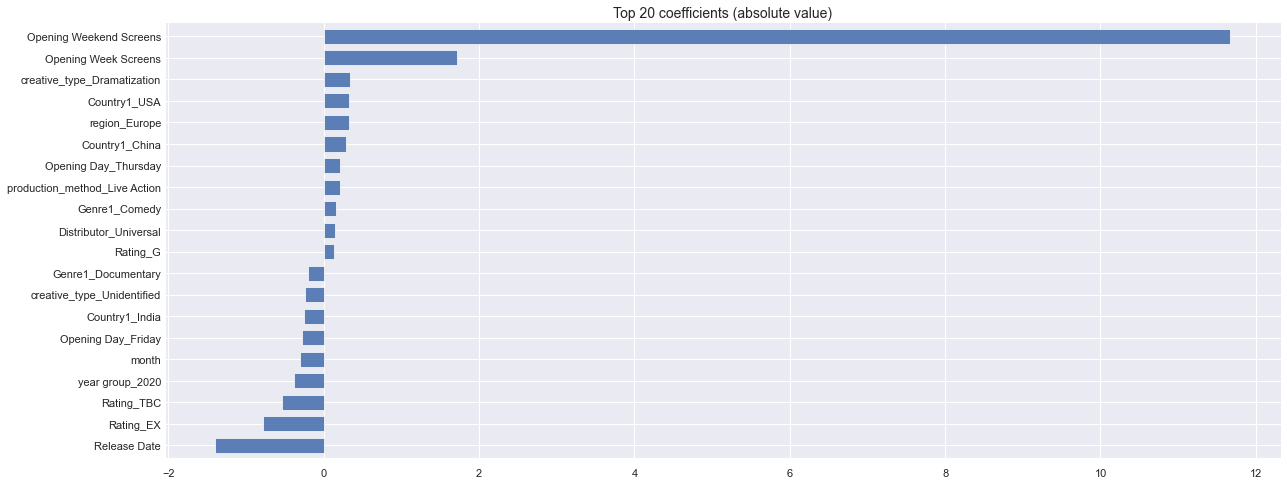

In [66]:
coefficients_rank_plot(lasso)
plt.show()

## 5.4 RandomForest

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor()


In [ ]:
#parameter tunning with random search
tuning_parameters = {
    'n_estimators':[100, 200, 300, 400, 500],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40, 50],
    'max_features': np.arange(1, X_train_norm.shape[1], 5),
}

randomForest_search = RandomizedSearchCV(model, tuning_parameters, cv = 5, n_iter= 20, return_train_score=True, n_jobs=4, random_state = 1)
randomForest_search.fit(X_train_norm, y_train)

randomForest = randomForest_search.best_estimator_

print('Best parameters for Random Forest:', randomForest_search.best_params_, '\n')

In [ ]:
randomForest.fit(X_train_norm, y_train)
pred_rf = randomForest.predict(X_test_norm)
pred_rf[pred_rf<0] = 0
rmsle_rf = mean_squared_log_error(np.exp(y_test),np.exp(pred_rf))
rmsle_rf

In [ ]:
def feature_rank_plot(model, labels = X_train.columns, max_features = 10):
    feature_importance = model.feature_importances_*100
    feature_importance = 100*(feature_importance/np.max(feature_importance))
    table = pd.Series(feature_importance, index = labels).sort_values(ascending=True, inplace=False)
    fig, ax = fig, ax = plt.subplots(figsize=(9,6))
    if len(table) > max_features:
        table.iloc[-max_features:].T.plot(kind='barh', width=0.7, linewidth=.8, alpha=0.8, ax=ax)
    else:
        table.T.plot(kind='barh', width=0.7, linewidth=.8, alpha=0.8, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    ax.set_title('Top 10 important features', fontsize=15)
    sns.despine()
    return fig, ax

feature_rank_plot(randomForest)
plt.show()

## 5.5 Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

In [ ]:

tuning_parameters = {
    'n_estimators':[100, 200, 300, 400, 500],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40, 50],
    'max_features': np.arange(1, X_train_norm.shape[1], 5),
}

gb_search = RandomizedSearchCV(model, tuning_parameters, cv = 5, n_iter= 20, return_train_score=True, n_jobs=4, random_state = 1)
gb_search.fit(X_train_norm, y_train)

gradientBoost = gb_search.best_estimator_

print('Best parameters for Gradient Boosting: ', gb_search.best_params_, '\n')

In [ ]:
gradientBoost.fit(X_train_norm, y_train)
pred_gb = gradientBoost.predict(X_test_norm)
pred_gb[pred_gb<0] = 0
rmsle_gb = mean_squared_log_error(np.exp(y_test),np.exp(pred_gb))
rmsle_gb

In [ ]:
feature_rank_plot(gradientBoost)
plt.show()

In [ ]:
dic = {'MLR': rmsle_lr, 'Ridge' : rmsle_ridge, 'Lasso' : rmsle_lasso, 'RF': rmsle_rf, 'GBR' : rmsle_gb }

In [ ]:
result = pd.DataFrame(list(dic.items()), columns=['Model', 'RMSLE'])

In [ ]:
result